# House Prices


##  Przeanalizowanie zadania
Moim zadaniem jest stworzenie modelu który bedzie przewidywał ceny kazdego domu na podstawie dostarczonego zbioru danych który zawiera róznorodne cechy związane z domami.

Zmienna docelowa ceny domów jest to wartość ciągła wiec zadanie jest problemem regresji

Metryka oceny bedzie pierwiastek błedu średniokwadratowego ( RMSE ) który jest średnią kwadratową róznic miedzy wartościami obserowanymi a wartościami przewidywanymi. Dowiadujemy sie dzeki niemu, w jakim stopniu model myli sie w przewidywaniach, wraz ze wzrostem wartości błedu rośnie waga tego wskaźnika


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Wczytywanie danych

In [ ]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

print(train.shape)
print(test.shape)

### Analiza danych

In [ ]:
train.info()

In [ ]:
train.sample(10)

In [ ]:
train.describe()

In [ ]:
train.dtypes.value_counts()

In [ ]:
# pd.set_option('display.max_rows',None) #Pokazuje wszystkie wiersze bez zadnego limitu
#wybiera tylko te kolumny z test.isnull().sum() które maja wartość True w masce utworzonej na podstawie train.isnull().sum() >=1
missing_values = train.isnull().sum()[train.isnull().sum()>= 1].sort_values(ascending= False)

In [ ]:
test.info()

In [ ]:
test.describe()

In [ ]:
test.isnull().sum()[train.isnull().sum() >=1]

In [ ]:
test.dtypes.value_counts()

In [ ]:
list_object = test.dtypes[test.dtypes== 'object'].index.tolist()
list_object

#### Wnioski

- W zbiorze treningowym znajduje sie 1460 wierszy i 81 cech
- W zbiorze testowym znajduje sie (145 i, 8 cech (zostala usunieta wartosc docelowa)
- Typy danych ktore znajduja sie zbiorze treningowym:
    1. object 43 -  to zmienne kategorialne
    2. int6  3 - zmienna liczby całowitej
    3.
float3   - zmienna liczby zmienno przecinkowej
- W 19 cecha w zbiorze treningowym brakuje wartosci
- Liczne brakujące wartości w kolumnach takich jak Alley, FireplaceQu, PoolQC
 - Typy danych ktore znajduja sie zbiorze testowym:
    1. object: 43 to zmienne kategorialne
    2. int64: 26 zmienna liczby całowitej
    3. float64: 11 zmienna liczby zmienno przecinkowe)

### Wizualizacja danych

In [ ]:
train.hist(bins = 50, figsize = (24,16))
plt.show()

#### Rozkład zmiennej docelowej

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(train['SalePrice'],kde = True, bins= 30)
plt.title('Rozkład SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Częstość')
plt.show()

Wnioski

- Rozkład jest prawostronnie asymetryczny (prawoskośny), co oznacza ze wieksza  cześć danych koncentruje sie w niższych wartosciach od 100 000 do 250 000
- Rozkład jest jednomodalny poniewaz posiada jeden wyraźny szczyt w okolicach wartości 150 000- 200 000, oznacza to ze większość cen domów w zbiorze danych mieści sie w tym przedziale

Asymetryczność ma negaywny wpływ na działanie niekótrych modeli regresji,takich jak regrsja liniowa które zakładaja normalność rozkładu zmiennej docelowej.

In [ ]:
train['LogSalePrice'] = np.log1p(train['SalePrice'])
sns.histplot(train['LogSalePrice'], kde=True, bins=30)

#### Wnioski

- Rozład jest bardziej symetryczny i zbliżony do normalnego (rozkładu Gaussa), oznacza to ze dane po transformacji lepiej spełniaja założenia normalnosci co wpłynie korzystniej na algorytmy uczenia maszynowego, takich jak regresja liniowa.
- wysokie ceny, które wczesniej znajdowały sie na prawym koncu rozkładu i wpływaja na asymetrie zostały skompresowane w bardzie zwartej formie przez co ich wpływ na modelowanie jest teraz ograniczony
- dominujacym przedziałem jest 12 co odpowiada rzeczywistej wartosci ceny
- rozkład normalny jest zblizony do normalnego. zastosowanie tej transrmacji poprawi predykcje

Funkcja wykonuje logarytm naturalny (logarytm w podstawie e) dodoając 1 do wartości wejściowej przed wykonaniem logarytmu co pozwala uniknąc błedu logarytmowania wartości 0 (prowadzi do nieskonczoności )

#### Relacja między YearBuilt (rok budowy) a SalePrice (cena sprzedaży)

In [ ]:
sns.scatterplot(x= train['YearBuilt'],y= train['SalePrice'])
plt.title('Zależność miedzy Rok Budowy - Cena sprzedazy')
plt.xlabel('YearBuilt (Rok budowy)')
plt.ylabel('SalePrice (Cena sprzedaży)')
plt.show()

In [ ]:
avg_price_by_year = train.groupby('YearBuilt')['SalePrice'].mean()
avg_price_by_year.plot(kind = 'line')
plt.title('Wykres liniowy średnich cen w zależności od roku budowy')
plt.grid()
plt.show()

#### Wnioski
- Ceny domow maja ogolną tendencje wzrostową 
- Ceny domów w okolicach roku 2000 rosna co jest logiczne poniewaz nowsze budynki zwykle mają lepsze standardy 
- Najwiecej domów zostało zbudowanych miedzy 1950 - 2000 co zoznacza ze był to okres intensywnego rozwoju budowlanego
- Istnieje kilka wyjątków:
    - kilka domów zdudowanych miedzy 1880-1900 które przekraczaja cene 300 000 co oznacza ze domy te maja jakas wartosc historyczna
    - kilka domow zbudowanych po 2000 jest bardzo drogich (powyżej 700 000) co oznacza ze to luksusowe rezydencje 

#### Rozkład dzielnic

In [ ]:
train['Neighborhood'].value_counts().plot(kind= 'bar')


In [ ]:
plt.figure(figsize= (10,6))
sns.barplot(x= train['Neighborhood'],y=train['SalePrice'])
plt.title('Rozkład cen w dzielnice')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize= (10,6))
sns.barplot(x= train['HeatingQC'],y=train['SalePrice'])
plt.title('Jakość systemu grzewczego w stosunku do ceny')
plt.show()


#### Wykres braków

In [ ]:
missing_values.plot(kind= 'bar',figsize= (12,6))
plt.title('Liczba braków w kolumnach')
plt.show()

#### Wnioski
Kolumny po lewej stronie wykresu mają najwiecej braków a im dalej w prawo, tym liczba braków maleje. 

Niektóre kolumny maja bardzo dużą liczbe braków, rozważe ich usuniecie.

## Przygotowywanie danych

Dane zmiennych kategorycznych zamienie za pomoca  One-Hot Encoding poniewaz:
- jest to odpowieni sposób dla zmiennych które nie mają naturalnego porzadku
- dzieki temu sposobowi kodowania zmiennych model nie zakłada fałszywej hierarchii miedzy wartościami w przeciwieństwie do Label Encoding gdzie liczby mogą sugerowac porzadek 
- One-Hot Encoding zwraca macierz rzadką


### Kolumna MSSubClass
Klasa nieruchomości

In [ ]:
train['MSSubClass'].value_counts()

### Kolumna MSZoning (Strefa funkcjonalna)

In [ ]:
train.groupby('MSZoning')['SalePrice'].mean().plot(kind= 'bar');

In [ ]:
train['MSZoning'].value_counts()

### Kolumna LotFrontage 
(Długość frontu działki) wypełnie puste miejsca srednia 


In [ ]:
train.groupby('LotFrontage')['SalePrice'].mean().plot(kind= 'bar');

In [ ]:
train['LotFrontage']= train['LotFrontage'].fillna(0)
test['LotFrontage']= test['LotFrontage'].fillna(0)


In [ ]:
train[train['LotFrontage'].isnull()]

### Kolumna LotArea
Powierzchnia działki

### Kolumna Street (Rodzaj ulicy)
użyje One Hot Encoder

In [ ]:
train['Street'].value_counts()

In [ ]:
train.groupby('Street')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna Alley (Rodzaj ulicy bocznej)
- One Hot Encoder
- Puste miejsca wypełnie wartościa None

In [ ]:
train['Alley']= train['Alley'].fillna('None')
test['Alley']= test['Alley'].fillna('None')

In [ ]:
train.groupby('Alley')['SalePrice'].mean().plot(kind= 'bar');

In [ ]:
train['Alley'].value_counts()

### Kolumna LotShape (Kształt działki)
- One Hot Encoder

In [ ]:
train['LotShape'].value_counts()

In [ ]:
train.groupby('LotShape')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna LandContour (Rzeźba terenu)
- One Hot Encoder


    - Lvl (Level): Teren jest płaski lub o minimalnym nachyleniu
    - Bnk (Bank): Działka znajduje się na brzegu wzniesienia 
    - HLS (Hillside): Teren jest stromy lub pagórkowaty 
    - Low (Low-lying): Teren jest nisko położony

In [ ]:
train['LandContour'].value_counts()

In [ ]:
train.groupby('LandContour')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna Utilities (Dostępność mediów)
- One Hot Encoder


In [ ]:
train['Utilities'].value_counts()

In [ ]:
train.groupby('Utilities')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna LotConfig (Układ działki)
- One Hot Encoder

    - Inside: Działka znajduje się w środku rzędu działek
    - Corner: Działka narożna, znajduje się na skrzyżowaniu ulic
    - CulDSac: Działka na końcu ślepej uliczki (cul-de-sac)
    - FR2: Działka przylegająca do dwóch ulic z przodu i tyłu
    - FR3: Działka przylegająca do trzech lub więcej ulic

In [ ]:
train['LotConfig'].value_counts()

In [ ]:
train.groupby('LotConfig')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna LandSlope (Nachylenie działki)
- One Hot Encoder

In [ ]:
train['LandSlope'].value_counts()

In [ ]:
train.groupby('LandSlope')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna Neighborhood (Nazwa dzielnicy)
- One Hot Encoder

In [ ]:
train['Neighborhood'].value_counts()

In [ ]:
plt.figure(figsize= (10,6))
sns.barplot(x= train['Neighborhood'],y=train['SalePrice'])
plt.title('Rozkład cen w dzielnice')
plt.xticks(rotation=90)
plt.show()

### Kolumna Condition1 (Główne warunki otoczenia)
- One Hot Encoder

In [ ]:
train['Condition1'].value_counts()

In [ ]:
train.groupby('Condition1')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna Condition2 (Dodatkowe warunki otoczenia
- One Hot Encoder

In [ ]:
train['Condition2'].value_counts()

In [ ]:
train.groupby('Condition2')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna BldgType (Typ budynku )
- One Hot Encoder

In [ ]:
train['BldgType'].value_counts()

In [ ]:
train.groupby('BldgType')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna HouseStyle (Styl budynku)
- One Hot Encoder

In [ ]:
train['HouseStyle'].value_counts()

In [ ]:
train.groupby('HouseStyle')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna OverallQual (Ogólna jakość budynku)
skala od 1 od 10


In [ ]:
train['OverallQual'].value_counts()

In [ ]:
train.groupby('OverallQual')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna OverallCond (Ogólny stan budynku)

In [ ]:
train['OverallCond'].value_counts()

In [ ]:
train.groupby('OverallCond')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna YearBuilt (Rok budowy budynku)

In [ ]:
train['YearBuilt'].value_counts()

In [ ]:
train.groupby('YearBuilt')['SalePrice'].mean().plot(kind= 'line');

### Kolumna YearRemodAdd (Rok ostatniej przebudowy)

In [ ]:
train['YearRemodAdd'].value_counts()

In [ ]:
train.groupby('YearRemodAdd')['SalePrice'].mean().plot(kind= 'line');

### Kolumna RoofStyle (Styl dachu)
- One Hot Encoder

In [ ]:
train['RoofStyle'].value_counts()

In [ ]:
train.groupby('RoofStyle')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna RoofMatl (Materiał pokrycia dachowego)
- One Hot Encoder

In [ ]:
train['RoofMatl'].value_counts()

In [ ]:
train.groupby('RoofMatl')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna Exterior1st (Materiał zewnętrzny na pierwszym poziomie budynku)
- One Hot Encoder

In [ ]:
train['Exterior1st'].value_counts()

In [ ]:
train.groupby('Exterior1st')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna Exterior2nd (Materiał zewnętrzny na drugim poziomie budynku)
- One Hot Encoder

In [ ]:
train['Exterior2nd'].value_counts()

In [ ]:
train.groupby('Exterior2nd')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna MasVnrType (Typ okładziny kamiennej)
- One Hot Encoder
- wypełnie puste wartosci None 

In [ ]:
train['MasVnrType']= train['MasVnrType'].fillna('None')
test['MasVnrType']= test['MasVnrType'].fillna('None')

In [ ]:
train['MasVnrType'].value_counts()

In [ ]:
train.groupby('MasVnrType')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna MasVnrArea (owierzchnia okładziny kamiennej)
 Określa rodzaj wykończenia elewacji budynku przy użyciu kamienia lub cegły.

- One Hot Encoder
- puste wartosci wypełniam 0

In [ ]:
train[(train['MasVnrType'] == 'None') & (train['MasVnrArea'].isna())][['MasVnrType','MasVnrArea']]

In [ ]:
train[(train['MasVnrType'] == 'None') & (train['MasVnrArea'] != 0)][['MasVnrType','MasVnrArea']]

In [ ]:
train['MasVnrArea']= train['MasVnrArea'].fillna(0)
test['MasVnrArea']= test['MasVnrArea'].fillna(0)

In [ ]:
train['MasVnrArea'].isnull().sum()

W kolumnach 'MasVnrArea' i 'MasVnrType' jest niescisłosc poniewaz w kolumnie nie wpisano typu a powierzchnia jest wpisana

### Kolumna ExterQual (Jakość materiałów wykończeniowych na zewnątrz budynku)
- mapowanie wartosci na numeryczne

In [ ]:
train.groupby('ExterQual')['SalePrice'].mean().plot(kind= 'bar');

In [ ]:
train['ExterQual'].value_counts()

In [ ]:
ExterQual_mapping = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1,'None':0}

train['ExterQual']= train['ExterQual'].map(ExterQual_mapping)
test['ExterQual']= test['ExterQual'].map(ExterQual_mapping)

### Kolumna ExterCond (Stan materiałów wykończeniowych na zewnątrz budynku.)
- mapowanie wartosci na numeryczne

In [ ]:
train['ExterCond'].value_counts()

In [ ]:
train.groupby('ExterCond')['SalePrice'].mean().plot(kind= 'bar');

In [ ]:
ExterCond_mapping = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1,'None':0}

train['ExterCond']= train['ExterCond'].map(ExterCond_mapping)
test['ExterCond']= test['ExterCond'].map(ExterCond_mapping)

In [ ]:
train['ExterCond'].value_counts()

### Kolumna Foundation (Typ fundamentów)
- One Hot Encoder

In [ ]:
train['RoofMatl'].value_counts()

In [ ]:
train.groupby('Exterior1st')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna BsmtQual (Jakość piwnicy)
- mapowanie wartosci na numeryczne
- wypełnienie wartościa None

In [ ]:
train['BsmtQual'].isnull().sum()

In [ ]:
train['BsmtQual']= train['BsmtQual'].fillna('None')
test['BsmtQual']= test['BsmtQual'].fillna('None')

In [ ]:
train['BsmtQual'].value_counts()

In [ ]:
BsmtQual_mapping = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1,'None':0}

train['BsmtQual']= train['BsmtQual'].map(BsmtQual_mapping)
test['BsmtQual']= test['BsmtQual'].map(BsmtQual_mapping)


In [ ]:
train['BsmtQual'].value_counts()

### Kolumna BsmtCond (Stan piwnicy)
- mapowanie wartosci na numeryczne
- wypełnienie wartościa None

In [ ]:
train['BsmtCond']= train['BsmtCond'].fillna('None')
test['BsmtCond']= test['BsmtCond'].fillna('None')

In [ ]:
train['BsmtCond'].value_counts()

In [ ]:
train.groupby('BsmtCond')['SalePrice'].mean().plot(kind= 'bar');

In [ ]:
BsmtCond_mapping = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1,'None':0}

train['BsmtCond']= train['BsmtCond'].map(BsmtCond_mapping)
test['BsmtCond']= test['BsmtCond'].map(BsmtCond_mapping)

In [ ]:
train['BsmtCond'].value_counts()

### Kolumna BsmtExposure (Ekspozycja piwnicy)
- wypełnienie wartościa No
- mapowanie wartosci na numeryczne


In [ ]:
train['BsmtExposure']= train['BsmtExposure'].fillna('No')
test['BsmtExposure']= test['BsmtExposure'].fillna('No')

In [ ]:
train['BsmtExposure'].value_counts()

In [ ]:
train.groupby('BsmtExposure')['SalePrice'].mean().plot(kind= 'bar');

In [ ]:
BsmtExposure_mapping = {'Gd':3,'Av':2,'Mn':1,'No':0}

train['BsmtExposure']= train['BsmtExposure'].map(BsmtExposure_mapping)
test['BsmtExposure']= test['BsmtExposure'].map(BsmtExposure_mapping)

In [ ]:
train['BsmtExposure'].value_counts()

### Kolumna BsmtFinType1 (Typ wykończenia piwnicy)
- wypełnienie wartościa None
- mapowanie wartosci na numeryczne


In [ ]:
train['BsmtFinType1']= train['BsmtFinType1'].fillna('None')
test['BsmtFinType1']= test['BsmtFinType1'].fillna('None')

In [ ]:
train['BsmtFinType1'].value_counts()

In [ ]:
train.groupby('BsmtFinType1')['SalePrice'].mean().plot(kind= 'bar');

In [ ]:
BsmtFinType1_mapping = {'GLQ':5,'ALQ':4,'BLQ':3,'Rec':2,'LwQ':1,'Unf':0,'None':-1}

train['BsmtFinType1']= train['BsmtFinType1'].map(BsmtFinType1_mapping)
test['BsmtFinType1']= test['BsmtFinType1'].map(BsmtFinType1_mapping)

In [ ]:
train['BsmtFinType1'].value_counts()

### Kolumna BsmtFinSF1 (Powierzchnia wykończonej piwnicy)

In [ ]:
train['BsmtFinSF1'].value_counts()

### Kolumna BsmtFinType2 (Typ drugiego wykończenia piwnicy)
- wypełnienie wartościa None
- mapowanie wartosci na numeryczne

In [ ]:
train['BsmtFinType2']= train['BsmtFinType2'].fillna('None')
test['BsmtFinType2']= test['BsmtFinType2'].fillna('None')

In [ ]:
train['BsmtFinType2'].value_counts()

In [ ]:
train.groupby('BsmtFinType2')['SalePrice'].mean().plot(kind= 'bar');

In [ ]:
BsmtFinType2_mapping = {'GLQ':5,'ALQ':4,'BLQ':3,'Rec':2,'LwQ':1,'Unf':0,'None':-1}

train['BsmtFinType2']= train['BsmtFinType2'].map(BsmtFinType2_mapping)
test['BsmtFinType2']= test['BsmtFinType2'].map(BsmtFinType2_mapping)

### Kolumna BsmtFinSF2 (Powierzchnia drugiego wykończenia piwnicy)

In [ ]:
train['BsmtFinSF2'].value_counts()

### Kolumna BsmtUnfSF (Powierzchnia niewykończonej piwnicy)

In [ ]:
train['BsmtUnfSF'].value_counts()

### Kolumna TotalBsmtSF (Całkowita powierzchnia piwnicy)

In [ ]:
train['TotalBsmtSF'].value_counts()

### Kolumna Heating (Rodzaj ogrzewania)
- One Hot Encoder

In [ ]:
train['Heating'].value_counts()

In [ ]:
train.groupby('Heating')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna HeatingQC (Jakość systemu grzewczego)
- mapowanie wartosci na numeryczne

In [ ]:
train['HeatingQC'].value_counts()

In [ ]:
train.groupby('HeatingQC')['SalePrice'].mean().plot(kind= 'bar');

In [ ]:
HeatingQC_mapping = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1,'None':0}

train['HeatingQC']= train['HeatingQC'].map(HeatingQC_mapping)
test['HeatingQC']= test['HeatingQC'].map(HeatingQC_mapping)

### Kolumna CentralAir (Czy jest klimatyzacja centralna)
- mapowanie wartosci na numeryczne na 0 albo 1

In [ ]:
train['CentralAir'].value_counts()

In [ ]:
train.groupby('CentralAir')['SalePrice'].mean().plot(kind= 'bar');

In [ ]:
CentralAir_mapping = {'Y':1,'N':0}

train['CentralAir']= train['CentralAir'].map(CentralAir_mapping)
test['CentralAir']= test['CentralAir'].map(CentralAir_mapping)

### Kolumna Electrical (Typ instalacji elektrycznej.)
- One Hot Encoder

In [ ]:
train['Electrical'].isnull().sum()

In [ ]:
train.groupby('Electrical')['SalePrice'].mean().plot(kind= 'bar');

In [ ]:
train['Electrical']= train['Electrical'].fillna('mode')
test['Electrical']= test['Electrical'].fillna('mode')

### Kolumna 1stFlrSF (Powierzchnia pierwszego piętra)

In [ ]:
train['1stFlrSF'].value_counts()

### Kolumna 2ndFlrSF (Powierzchnia drugiego piętra)

In [ ]:
train['2ndFlrSF'].value_counts()

### Kolumna LowQualFinSF (Powierzchnia niskiej jakości wykończenia)

In [ ]:
train['LowQualFinSF'].value_counts()

### Kolumna GrLivArea (Powierzchnia powierzchni mieszkalnej)

In [ ]:
train['GrLivArea'].value_counts()

### Kolumna BsmtFullBath (Liczba pełnych łazienek w piwnicy)

In [ ]:
train['BsmtFullBath'].value_counts()

### Kolumna BsmtHalfBath (Liczba łazienek półpełnych w piwnicy)

In [ ]:
train['BsmtHalfBath'].value_counts()

### Kolumna FullBath (Liczba pełnych łazienek w budynku)

In [ ]:
train['FullBath'].value_counts()

### Kolumna HalfBath (Liczba łazienek półpełnych w budynku)

In [ ]:
train['HalfBath'].value_counts()

### Kolumna BedroomAbvGr (Liczba sypialni na piętrze)

In [ ]:
train['BedroomAbvGr'].value_counts()

### Kolumna KitchenAbvGr (Liczba kuchni na piętrze)

In [ ]:
train['KitchenAbvGr'].value_counts()

### Kolumna KitchenQual (Jakość kuchni)

In [ ]:
train['KitchenQual'].value_counts()

In [ ]:
train.groupby('KitchenQual')['SalePrice'].mean().plot(kind= 'bar');

In [ ]:
KitchenQual_mapping = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1,'None':0}

train['KitchenQual']= train['KitchenQual'].map(KitchenQual_mapping)
test['KitchenQual']= test['KitchenQual'].map(KitchenQual_mapping)

### Kolumna TotRmsAbvGrd (Łączna liczba pokoi powyżej poziomu gruntu)

In [ ]:
train['TotRmsAbvGrd'].value_counts()

### Kolumna Functional (Funkcjonalność budynku)
- One Hot Encoder

In [ ]:
train['Functional'].value_counts()

In [ ]:
train.groupby('Functional')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna Fireplaces (Liczba kominków w budynku)

In [ ]:
train['Fireplaces'].value_counts()

### Kolumna FireplaceQu (Jakość kominka)


Do ocena jakosci kominka uzyto wartosci które bedze mozna 
- Ex: Doskonała.
- Gd: Dobra.
- TA: Średnia.
- Fa: Niska.
- Po: Bardzo niska.
- None: Brak kominka.

In [ ]:
train['FireplaceQu']= train['FireplaceQu'].fillna('None')
test['FireplaceQu']= test['FireplaceQu'].fillna('None')

In [ ]:
train.groupby('FireplaceQu')['SalePrice'].mean().plot(kind= 'bar');

In [ ]:
fireplace_quality_mapping = {'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1,'None':0}

train['FireplaceQu']= train['FireplaceQu'].map(fireplace_quality_mapping)
test['FireplaceQu']= test['FireplaceQu'].map(fireplace_quality_mapping)

In [ ]:
train['FireplaceQu'].value_counts()

### Kolumna GarageType (Typ garażu)
- One Hot Encoder
- wypełnienie wartości None

In [ ]:
train['GarageType']= train['GarageType'].fillna('None')
test['GarageType']= test['GarageType'].fillna('None')

In [ ]:
train['GarageType'].value_counts()

### Kolumna GarageYrBlt (Rok budowy garażu)
- wypełnienie wartości 0

In [ ]:
train['GarageYrBlt']= train['GarageYrBlt'].fillna(0)
test['GarageYrBlt']= test['GarageYrBlt'].fillna(0)

In [ ]:
train['GarageYrBlt'].value_counts()

### Kolumna GarageFinish (Wykończenie garażu)
- mapowanie wartosci na numeryczne
- wypełnienie wartości None

In [ ]:
train['GarageFinish']= train['GarageFinish'].fillna('None')
test['GarageFinish']= test['GarageFinish'].fillna('None')


In [ ]:
train['GarageFinish'].value_counts()

In [ ]:
train.groupby('GarageFinish')['SalePrice'].mean().plot(kind= 'bar');

In [ ]:
garage_finish_mapping= {'Fin':3,'RFn':2,'Unf':1,'None':0}

train['GarageFinish']= train['GarageFinish'].map(garage_finish_mapping)
test['GarageFinish']= test['GarageFinish'].map(garage_finish_mapping)

### Kolumna GarageCars (Liczba miejsc parkingowych w garażu)
- wypełnienie wartości 0
- One Hot Encoder

In [ ]:
train['GarageCars']= train['GarageCars'].fillna(0)
test['GarageCars']= test['GarageCars'].fillna(0)

In [ ]:
train['GarageCars'].value_counts()

In [ ]:
train.groupby('GarageCars')['SalePrice'].mean().plot(kind= 'bar');

### Kolumna GarageArea (Powierzchnia garażu)
- wypełnienie wartości 0

In [ ]:
train['GarageArea']= train['GarageArea'].fillna(0)
test['GarageArea']= test['GarageArea'].fillna(0)

In [ ]:
train['GarageArea'].value_counts()

### Kolumna GarageQual (Jakość garażu)
- wypełnienie wartości None
- mapowanie wartosci na numeryczne

In [ ]:
train['GarageQual']= train['GarageQual'].fillna('None')
test['GarageQual']= test['GarageQual'].fillna('None')

In [ ]:
train['GarageQual'].value_counts()

In [ ]:
train.groupby('GarageQual')['SalePrice'].mean().plot(kind= 'bar');

In [ ]:
garage_quality_mapping = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0}

train['GarageQual']= train['GarageQual'].map(fireplace_quality_mapping)
test['GarageQual']= test['GarageQual'].map(fireplace_quality_mapping)

### Kolumna GarageCond (Stan garażu)
- wypełnienie wartości None
- mapowanie wartosci na numeryczne

In [ ]:
train['GarageCond']= train['GarageCond'].fillna('None')
test['GarageCond']= test['GarageCond'].fillna('None')

In [ ]:
train['GarageCond'].value_counts()

In [ ]:
train.groupby('GarageCond')['SalePrice'].mean().plot(kind= 'bar');

In [ ]:
garage_cond_mapping = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0}

train['GarageCond']= train['GarageCond'].map(garage_cond_mapping)
test['GarageCond']= test['GarageCond'].map(garage_cond_mapping)

### Kolumna PavedDrive

In [ ]:
train['PavedDrive'].value_counts()

In [ ]:
train.groupby('PavedDrive')['SalePrice'].mean().plot(kind= 'bar');

In [ ]:
pavedDrive_mapping = {'P':0.5,'Y':1,'N':0}

train['PavedDrive']= train['PavedDrive'].map(pavedDrive_mapping)
test['PavedDrive']= test['PavedDrive'].map(pavedDrive_mapping)

### Kolumna WoodDeckSF (Powierzchnia drewnianego tarasu)

In [ ]:
train['WoodDeckSF'].value_counts()

### Kolumna OpenPorchSF (Powierzchnia otwartego tarasu)

In [ ]:
train['OpenPorchSF'].value_counts()

### Kolumna EnclosedPorch (Powierzchnia zamkniętego tarasu)

In [ ]:
train['EnclosedPorch'].value_counts()

### Kolumna 3SsnPorch (Powierzchnia tarasu na 3 sezony)

In [ ]:
train['3SsnPorch'].value_counts()

### Kolumna ScreenPorch (Powierzchnia tarasu z ekranami)

In [ ]:
train['ScreenPorch'].value_counts()

### Kolumna PoolArea (Powierzchnia basenu)

In [ ]:
train['PoolArea'].value_counts()

### Kolumna PoolQC (Jakość basenu)
- wypełnienie wartości None
- mapowanie wartosci na numeryczne

odnosi sie do jakosci basenu w domach, jest tylko 7 watosci poniewaz w 7 domach sa tylko baseny. Oznacza to ze posiadanie basenów jest bardzo rzadkie i moze byc cechą charakterystyczna dla luksusowych nieruchomości. Warto bedzie przeprowadzic analize jak posiadanie basenu wpływa na cene

Zamierzam wypełnic puste wartosci a nastepnie zakodowac jako zmienna numeryczna aby uwzglednic ja w  modelu.
- Gd good
- Ex Excellent
- Fa fair

In [ ]:
train['PoolQC']= train['PoolQC'].fillna('None')
test['PoolQC']= test['PoolQC'].fillna('None')

In [ ]:
train['PoolQC'].value_counts()

In [ ]:
train.groupby('PoolQC')['SalePrice'].mean().plot(kind= 'bar')
plt.title('Analiza wpływu PoolQC na SalePrice')
plt.show()

In [ ]:
PoolQC_mapping = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0}

train['PoolQC']= train['PoolQC'].map(PoolQC_mapping)
test['PoolQC']= test['PoolQC'].map(PoolQC_mapping)

### Kolumna Fence (Obecność ogrodzenia)
- wypełnienie wartości None
- mapowanie wartosci na numeryczne



- GdPrv: Dobre prywatne.
- MnPrv: Średnie prywatne.
- GdWo: Dobre, ale bez prywatności.
- MnWw: Średnie, bez prywatności.
- None: Brak ogrodzenia.

In [ ]:
train['Fence']= train['Fence'].fillna('None')
test['Fence']= test['Fence'].fillna('None')

In [ ]:
train['Fence'].value_counts()

In [ ]:
train.groupby('Fence')['SalePrice'].mean().plot(kind= 'bar');

In [ ]:
fence_mapping = {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'None':0}

train['Fence']= train['Fence'].map(fence_mapping)
test['Fence']= test['Fence'].map(fence_mapping)

### Kolumna MiscFeature (Dodatkowe cechy )
- wypełnienie wartości None
- One Hot Encoder

Zawiera informacje o dodatkowych cechach nieruchomości kóre nie sa opisane w innych kolumnach, 

Zamierzam wypełnic braki i zakodowac kolumne na wartosci numeryczne

- Shed schowek,szopa
- Gar2 garage 2
- othr other
- TenC Tennis Court

In [ ]:
train.groupby('MiscFeature')['SalePrice'].mean().plot(kind= 'bar');

In [ ]:
train['MiscFeature']= train['MiscFeature'].fillna('None')
test['MiscFeature']= test['MiscFeature'].fillna('None')

In [ ]:
train['MiscFeature'].value_counts()

### Kolumna MiscVal (Wartość dodatkowych cech)

In [ ]:
train['MiscVal'].value_counts()

### Kolumna MoSold (Miesiąc sprzedaży)

In [ ]:
train['MoSold'].value_counts()

### Kolumna YrSold (Rok sprzedaży)

In [ ]:
train['YrSold'].value_counts()

In [ ]:
train.groupby('YrSold')['SalePrice'].mean().plot(kind= 'hist');

### Kolumna SaleType (Typ sprzedaży)
- One Hot Encoder

In [ ]:
train['SaleType'].value_counts()

### Kolumna SaleCondition (Warunki sprzedaży)
- One Hot Encoder

In [ ]:
train['SaleCondition'].value_counts()

In [ ]:
train.groupby('SaleCondition')['SalePrice'].mean().plot(kind= 'bar');

# Standaryzacja i One Hot Encoding

1. Dane numeryczne
    - Wykorzystałem StandardScaler, aby standadaryzowac dane numeryczne (średnia 0, odchylenie standardowe 1). Standaryzacja polega na odejmowaniu sredniej od orginalnej wartosci a nastepnie wynik jest dzielony przez odchylenie standardowe
2. Dane kategoryczne:
    - Wykorzystałem OneHotEncoder aby zakodowac zmienne kategorialne na postac liczbową. Przekształca każda kategorie z danej kolumny na unikalny wektor binarny (0,1). Wynikiem domyslnym jest macierz rzadka ( macierz która zawiera tylko 0 i 1)


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

attribs_one_hot = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
    'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Electrical',
    'MasVnrType','Foundation','Heating','Functional','GarageType','GarageCars','MiscFeature','SaleType','SaleCondition',]
attribs_num= ['Id','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
    'ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinSF1','BsmtFinType1','BsmtFinType2',
    'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','HeatingQC','CentralAir','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
    'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd',
    'Fireplaces','FireplaceQu','GarageYrBlt','GarageFinish','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF',
    'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscVal','MoSold','YrSold']


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

scaler = StandardScaler()

train_scaled = scaler.fit_transform(train[attribs_num])
test_scaled =  scaler.transform(test[attribs_num])
train_scaled = pd.DataFrame(train_scaled, columns = attribs_num, index = train.index)
test_scaled = pd.DataFrame(test_scaled, columns= attribs_num, index=test.index)



encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

train_encoded = encoder.fit_transform(train[attribs_one_hot])
test_encoded = encoder.transform(test[attribs_one_hot])

#pobieranie nazw zakodowanyck kolumn
encoded_column = encoder.get_feature_names_out(attribs_one_hot)

# Zamiana na dataframe z odpowienimi nazwami kolumn
train_encoded = pd.DataFrame(train_encoded, columns= encoded_column, index= train.index)
test_encoded = pd.DataFrame(test_encoded, columns= encoded_column, index= test.index)


### Łącznie kolumn
pd.concat pozwala na łaczenie obiektów DataFrame wzdłuż określonej osi (axis = 1 pionowo)
odbywa sie to na poziomie indeksów,  kolumny z train_scaled i kolumny z train_encoded beda dołączone do siebie i zapisane w nowej zmiennej train_final

Jezeli kolumny sa róznej długosci wiersze bez odpowiednika beda wypełnione NaN

In [ ]:
train_final = pd.concat([train_scaled,train_encoded],axis = 1)
test_final = pd.concat([test_scaled, test_encoded], axis=1)

print(train_final.shape)
print(test_final.shape)


# Walidacja danych i Trenowanie Modelu bazowego


Root Mean Squared Error (RMSE) czyli pierwiastek z błędu średniokwadratowego.

- RMSE jest miarą odległosci miedzy wartościami rzeczywistymi (y) a przewidywanymi (y_pred).
- Niższy wynik oznacza lepsze przewidywanie rzeczywiste wartości 
- RMSE opiera sie na błedzie kwadratowym, kładzie wiekszy nacisk na wieksze róznice medzy przewidywana a rzeczywistą warościa

W bibliotece scikit-learn nie jest dostepna metryka RMSE ale mozna go łatwo obliczyc za pomocą funkcji mean_squared_error z dodaniem pierwiastka

In [ ]:
from sklearn.metrics import mean_squared_error

def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

### Wczytywanie danych

In [ ]:
X = train_final.drop(['Id'], axis =1)
y =train['LogSalePrice']

## Model Bazowy 

Model bazowy służy do stworzenia punktu odniesienia z bardziej złozonymi modelami.
DummyRegressor ignoruje dane wejsciowe i dokonuje przewidywan na podstwie prostej reguły. W tym przypadku przewiduje on srednia wartość zmiennej docelowej w danych treningowych (średnia lub mediane)

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size= 0.2, random_state=42)

- za pomoca funkcji train_test_split przed rozdzieleniem podzbiorów przeprowadza wewnętrzene tasowanie zestawów danych uczących
- Dzieki parametrowi random_state okreslilismy ziarno losowości dla wewnetrznego generatora liczb pseudolosowych który słuzy do tasowania zestawów danych przed ich rozdzieleniem. Wprowadzenie ziarna o ustalonej wartości pozwala na zachowac odtwarzalnosc doswiadczen

In [ ]:
model = DummyRegressor()
model.fit(X_train, y_train)

y_pred_log = model.predict(X_val)

y_val_real = np.exp(y_val)
y_pred_real = np.exp(y_pred_log)

rmse_log= root_mean_squared_error(y_val, y_pred_log )
print(f"RMSE w logarytmicznej skali: {rmse_log}")

rmse_real= root_mean_squared_error(y_val_real, y_pred_real )
print(f"RMSE w oryginalnej skali: {rmse_real}")



Model oblicza srednią wartość zeminnej y_train (zlogarytmowanych wartości SalePrice) i zapamietuje ja jako regułe do przewidywań.
DummyRegressor ignoruje cechy X_train, nie bierze pod uwage żadnych zależności miedzy X_traina y_train.

Model nastepnie generuje przewidywania dla danych walidacyjnych (X_val). W tym przypadku kazde przewidywanie bedzie równe sredniej wartosci y_train obliczonej podczas trenowania modelu 

Odwrotnie  logarytmuje rzeczywiste wartosci zmiennej docelowej (y_val) z logarytmowanej skali do orginalnej wartosci 
odwrotnie logarytmuje przewidywane watorsci (y_pred_log) z logatytmowanej skali do orginalnej 

RMSE mierzy srednia odległosc miedzy rzeczywistymi wartosciami (y_val) a przewidywanymi wartosciami (y_pred_log)
Orginalna skala jest bardziej intuicyjna poniewaz wynik podowany jest w tej samej jednostce co dane 


#### Interpretacja wyniku
Srednia cena budynku wynosi około 180 921 dolarów
Przecietny błąd modelu wynosi około 88 270 dolarów 

Bład względny(Realtive RMSE) = RMSE/ Srednia cena  = 88 270 / 180 921 = 0.487

Oznacza to ze model przewiduje ceny z błedem wynoszącym około 49%, zatem sprawnosc modelu wynosi 51%

## Budowa Modelu

### Walidacja KFold 

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold


def fitting_model(model, X, y, folds = 6 ):
    kf = KFold(n_splits=folds)
    
    metric_rmse=[]
    for train_idx, test_idx in kf.split(X,y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
        model.fit(X_train,y_train)
        y_pred_log = model.predict(X_val)
        
        # Przekształcenie do oryginalnej skali
        y_val_real = np.exp(y_val)
        y_pred_real = np.exp(y_pred_log)
        
        score =  root_mean_squared_error(y_val_real, y_pred_real )
        metric_rmse.append(score)
    return ("RMSE w oryginalnej skali: ",sum(metric_rmse)/len(metric_rmse), "sprawnosc modelu ", round(100-((sum(metric_rmse)/len(metric_rmse))/180921)*100, 2),"%")
    


Podział zbioru treningowe został podzielony na n róznych czesci(foldów). Podczas każdego obiegu jeden fold staje sie zbiorem walidacyjnym a pozostałem n foldów stanowi zbiór treningowy.

W pętli for iterujemy przez kazdy podział generujac indeksy liczbowe wierszy dla zbioru treningowego i walidacyjnego wybierajac odpowiednie wiersze na ich podstawie 

Zastosowany model bedzie przetrenowany poprzez podstawienie modelu do agrumentów funkcji 

### Wyres krzywej uczenia sie 

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer

def plot_learning_curve(model, X, y, cv= 5):
    rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
    
    # Przekształcenie y do skali oryginalnej
    y_exp = np.exp(y)
    
    # Obliczanie krzywej uczenia
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y_exp, cv=cv, scoring=rmse_scorer, train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=1
    )
    
    # Obliczanie średniej i odchylenia standardowego dla zbiorów treningowych i walidacyjnych
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    # Wizualizacja krzywej uczenia
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Błąd treningowy", marker='o',color="r")
    plt.plot(train_sizes, val_mean, label="Błąd walidacyjny", marker='o',color="g")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1,color="g")
    
    plt.xlabel("Liczba próbek treningowych")
    plt.ylabel("RMSE (niższy lepszy)")
    plt.title("Krzywa uczenia się")
    plt.legend()
    plt.grid()
    plt.show()

### Zastosowanie modeli 

#### DecisionTreeRegressor

In [ ]:
model_tree = DecisionTreeRegressor(random_state=42, max_depth=2)
print(fitting_model(model_tree,X,y,folds=7))
plot_learning_curve(model_tree, X, y, cv=7)

- Błąd treningowy przy małej liczbie danych treningowych jest niski ale wraz ze wzrostem liczby próbek bład treningowy rośnie, na koncu sie stabilizuje 
- Błąd walidacyjny na poczatku jest duży poniewaz model nie wystarczajaco dobrze generalizuje lecz wraz ze wzrostem próbek bład spada co wskazuje na poprawe zdolności generalizacji, jednak na koncu sie stabilizuje
- na koczu wykresu widac ze błąd walidacyjny jest wyraznie wyższy niz bład treningowy wskazuje to na niedopasowanie modelu, możliwe ze model jest zbyt prosty aby uchwycic złozone wzorce w danych 

In [ ]:
model_tree = DecisionTreeRegressor(random_state=42, max_depth=5)
print(fitting_model(model_tree,X,y,folds=7))
plot_learning_curve(model_tree, X, y, cv=7)

Po zmiekszeniu głebokości
-  Błąd walidacyjny uległ wyraznej poprawie co pozwoliłi modelowi uchwycic bardziej zożone zależności w danych
-  Błąd treningowy zmniejszył sie co oznacza model lepiej radzi sobie z dopasowaniem danych treningowych

Zwiekszenie głebokości drzewa spowodowało ze model jest bardziej dopasowany do danych a róznica miedzy błedami treningowymi i walidacyjnymi wkazuje na przeuczenie 

#### RandomForestRegressor

- max_depth parametr ten decyduje o złozonosci modelu i liczbie interrakcji miedzy cechami które model jest w stanie uchwycic
- n_estimators prarmetr ten kontroluje liczbe drzew w lesie 

In [ ]:
model_forest = RandomForestRegressor(max_depth=2, n_estimators=20)
print(fitting_model(model_forest,X,y,folds=7))
plot_learning_curve(model_forest, X, y, cv=7)


- Błąd walidacyjny: Wraz ze wzrostem liczby danych błąd walidacyjny nie poprawia się, a w końcowej fazie pogarsza się.
- rozrzut błedu walidacyjnego sugeruje ze model jes niestabilny
- Bład treningowy jest stosunkowy wysoki moze wskazywac ze model nie jest wystarczajaco złożony

Model jest niedouczony 

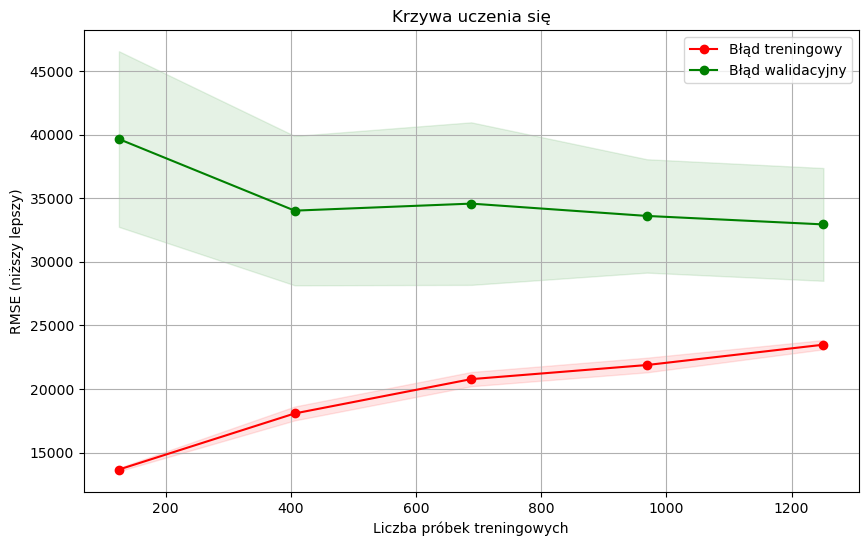

In [206]:
model_forest = RandomForestRegressor(max_depth=5, n_estimators=1000)
print(fitting_model(model_forest,X,y,folds=7))
plot_learning_curve(model_forest, X, y, cv=7)


- Linia błedu walidacyjnego stabilizuje sie wraz ze wzrostem liczby danych co oznacza ze model wraz ze zwiekszeniem danych dobrze generalizuje
- Rozrzut wyników walidacji jest jest mniejszy co swiadczu o wiekszej stabilnosci modelu 
- Zmniejszenie błedu treningowego wskazuje ze model dobrze odszukuje wzorce w danych


#### ExtraTreesRegressor

In [ ]:
model_ext_tree = ExtraTreesRegressor(max_depth=7, n_estimators=20)
print(fitting_model(model_ext_tree,X,y,folds=7))
plot_learning_curve(model_ext_tree, X, y, cv=7)




('RMSE w oryginalnej skali: ', 20861.667490661985, 'sprawnosc modelu ', 88.47, '%')


- Bład treningowy wzrasta wraz ze wzrostem liczby danych wzrasta ale nie zacząco
- Błąd walidacyjny znaczaco maleje wraz ze wzrostem liczby danych na konsu sie stabilizuje, rozrzut pozostaje taki sam co oznacza niestabilnosc modelu bez wzgledu na ilosc próbek
- rozbieżnośc miedzy błedem treningowym a walidacyjnym wskazuje na przeuczenie modelu

In [ ]:
model_ext_tree = ExtraTreesRegressor(max_depth=7, n_estimators=500)
print(fitting_model(model_ext_tree,X,y,folds=7))
plot_learning_curve(model_ext_tree, X, y, cv=7)

#### GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbr = GradientBoostingRegressor(max_depth=5, n_estimators=100, random_state=42)
print(fitting_model(model_gbr,X,y,folds=7))
plot_learning_curve(model_gbr, X, y, cv=7)

#### XGBRegressor

In [ ]:
model_xgb = XGBRegressor(max_depth=20, learning_rate=0.1, n_estimators=100, random_state=42)

print(fitting_model(model_xgb,X,y,folds=7))
plot_learning_curve(model_xgb, X, y,  cv=7)



In [ ]:
from sklearn.linear_model import ElasticNet
model_elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
print(fitting_model(model_elastic,X,y,folds=7))
plot_learning_curve(model_elastic, X, y, cv=7)

## Feature Engineering:


In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42, max_depth=16)

cv = KFold(n_splits=7)

metric_rmse=[]
for train_idx, test_idx in cv.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train,y_train)
    y_pred_log = model.predict(X_val)
    
    # Przekształcenie do oryginalnej skali
    y_val_real = np.exp(y_val)
    y_pred_real = np.exp(y_pred_log)
    
    score =  root_mean_squared_error(y_val_real, y_pred_real )
    metric_rmse.append(score)
    
print("RMSE w oryginalnej skali: ", (sum(metric_rmse)/len(metric_rmse)))


## Hiperparametryzacja

In [ ]:
import lightgbm as lgb

# Inicjalizacja modelu LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42, verbosity = 0)

# RandomizedSearchCV na całym zbiorze treningowym
random_search_lgb = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid_xgb,
    n_iter=100, 
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    cv=skf
)

random_search_lgb.fit(X, y)

best_params_lgb = random_search_lgb.best_params_
best_score_lgb = random_search_lgb.best_score_
print("Najlepsze parametry:", best_params_lgb)
print("Najlepsza dokładność:", best_score_lgb)

plot_learning_curve(random_search_lgb.best_estimator_, X, y, cv=skf)


## Trenowanie na danych testowych

## Przygotowanie Submission